# A model that catches "abnormal" instances of every citizen and sends the instances to a database

![](https://www.canwelivebetter.bayer.com/sites/default/files/2018-05/NEW_Heartbeat_looping_GIF_NORMAL_0.gif)

## 1. Introduction


In this study, we present a model to detect anomalies in the healthcare do-main based on Supervised Machine learning algorithm where we have our labeled data. Our model intends to locate anomalies that are far from a certain threshold distance with respect to their clusters. Classification techniques such as K-Nearest Neighbor (KNN), Random Forest (RF), Support Vector Machines (SVM), Naive Bayes (NB), and Logistic Regression (LR) are applied to build the resultant prediction model.

### 1.1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,RobustScaler,label_binarize,RobustScaler
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier

### 1.2. Importing Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


## About the Dataset:

The Heart Disease Data Set has the following 14 atributes:
14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (target) (the predicted attribute) 

## Atributes documentation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


df.describe()

In [4]:
print('DF Shape:', df.shape)

DF Shape: (303, 14)


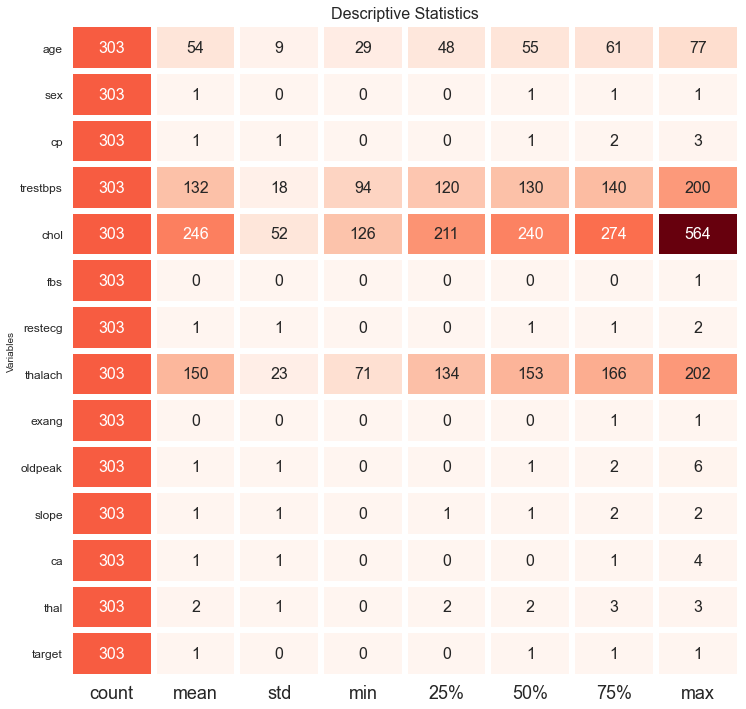

In [5]:
desc = df.describe().T
df1 = pd.DataFrame(index=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Reds", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

### 1.3. Checking for Missing Values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 2. Data Visualization

### 2.1 Corr Heat Map

<AxesSubplot:>

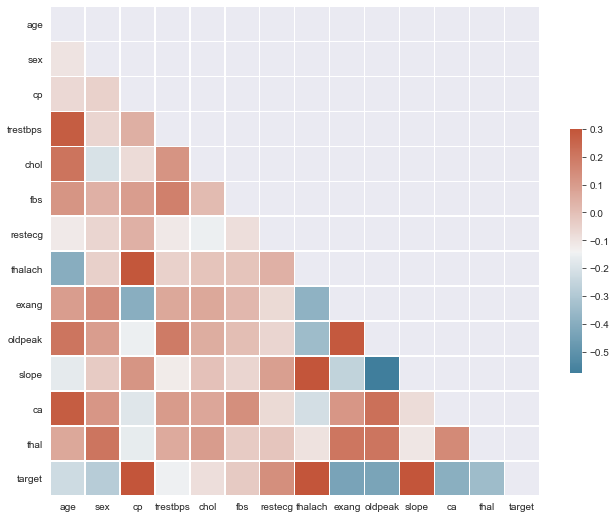

In [7]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap = True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,square=True,linewidths=.5,cbar_kws={'shrink':.5})

In [8]:
# target correlations

corr.sort_values(by=['target'],ascending=False).iloc[0].sort_values(ascending=False)

target      1.00
cp          0.43
thalach     0.42
slope       0.35
restecg     0.14
fbs        -0.03
chol       -0.09
trestbps   -0.14
age        -0.23
sex        -0.28
thal       -0.34
ca         -0.39
oldpeak    -0.43
exang      -0.44
Name: target, dtype: float64

### 2.2 Count Plot

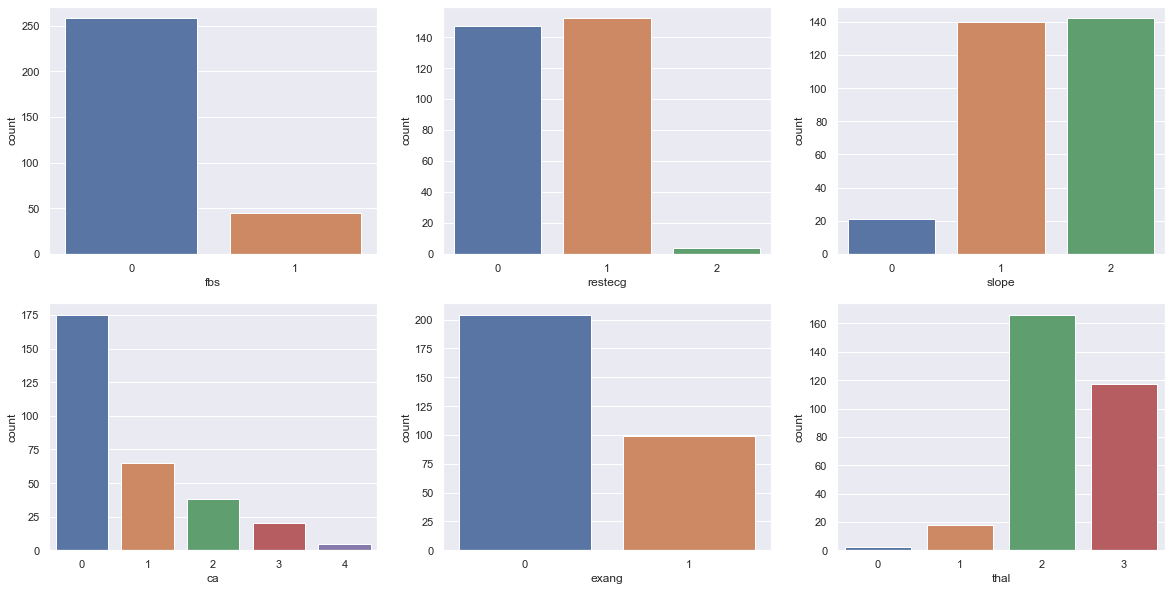

In [9]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.countplot(data=df,x='fbs')
plt.subplot(2,3,2)
sns.countplot(data=df,x='restecg')
plt.subplot(2,3,3)
sns.countplot(data=df,x='slope')
plt.subplot(2,3,4)
sns.countplot(data=df,x='ca')
plt.subplot(2,3,5)
sns.countplot(data=df,x='exang')
plt.subplot(2,3,6)
sns.countplot(data=df,x='thal')
plt.show()

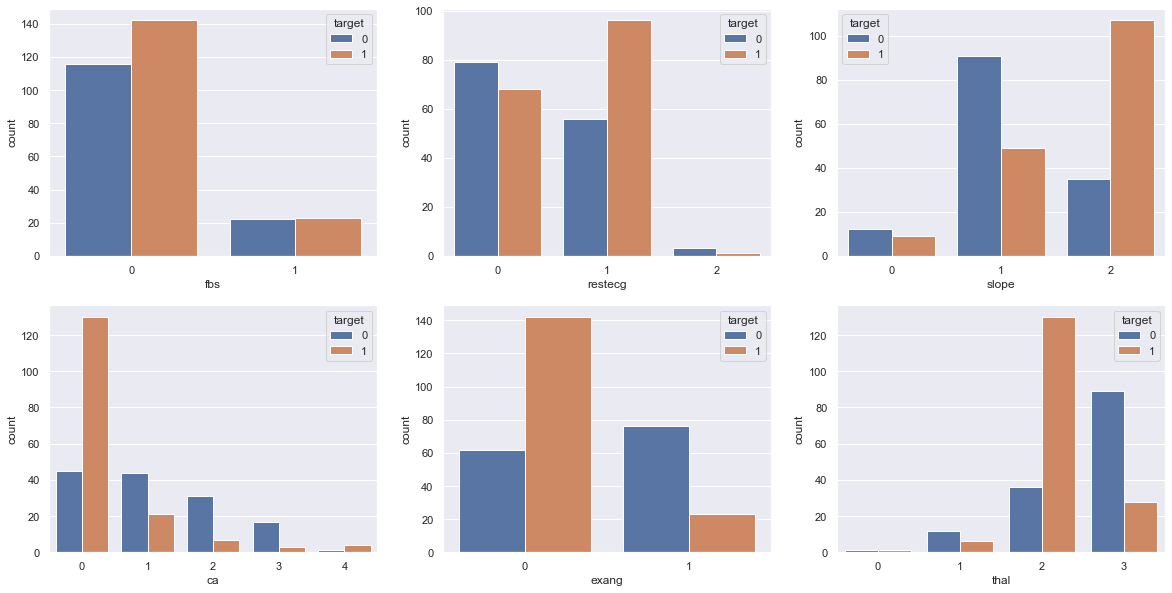

In [10]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.countplot(data=df,x='fbs',hue='target')
plt.subplot(2,3,2)
sns.countplot(data=df,x='restecg',hue='target')
plt.subplot(2,3,3)
sns.countplot(data=df,x='slope',hue='target')
plt.subplot(2,3,4)
sns.countplot(data=df,x='ca',hue='target')
plt.subplot(2,3,5)
sns.countplot(data=df,x='exang',hue='target')
plt.subplot(2,3,6)
sns.countplot(data=df,x='thal',hue='target')
plt.show()

### 2.3 Hist Plot

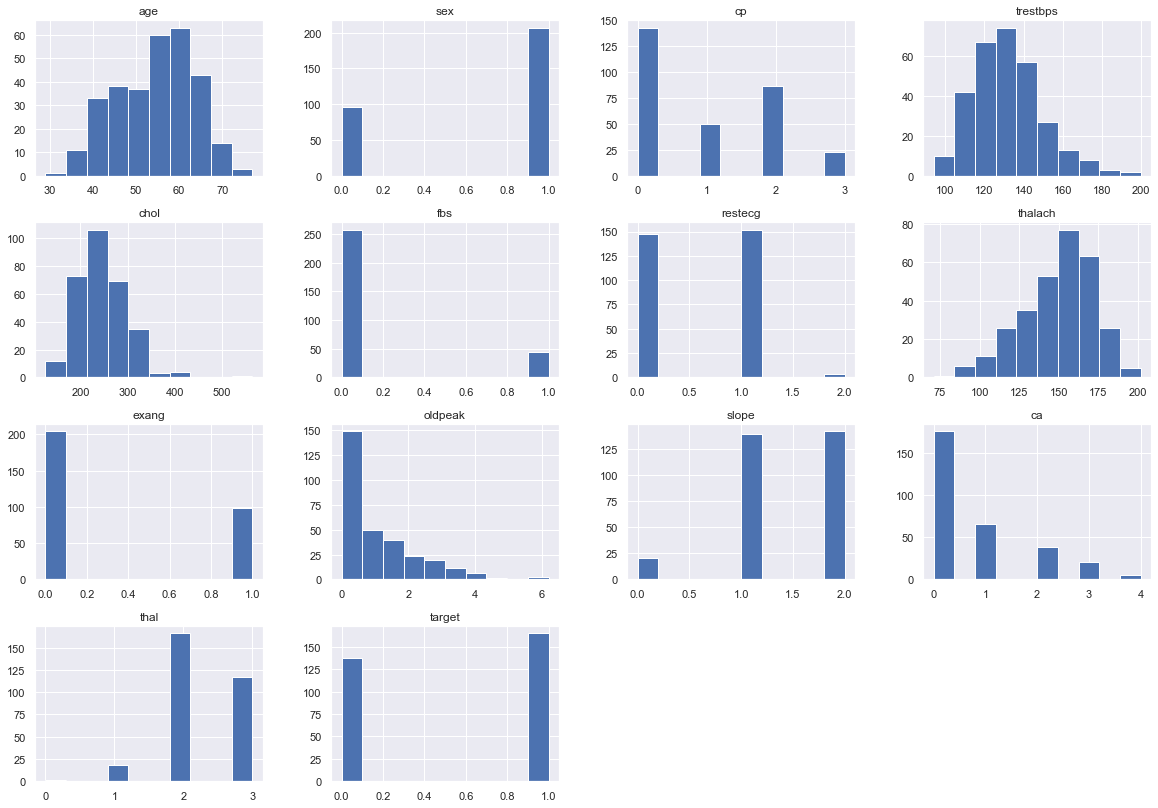

In [11]:
df.hist(figsize=(20,14))
plt.show()

### 2.4 Dist Plot

<Figure size 504x504 with 0 Axes>

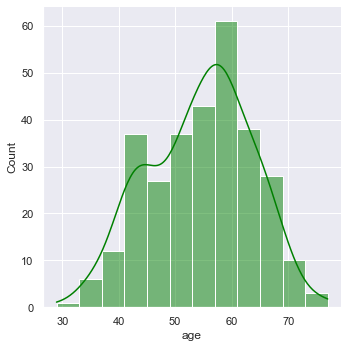

In [12]:
fig = plt.figure(figsize=(7,7))
ax = sns.displot(df.age,color='green',kde=True,label='Age')

<Figure size 504x504 with 0 Axes>

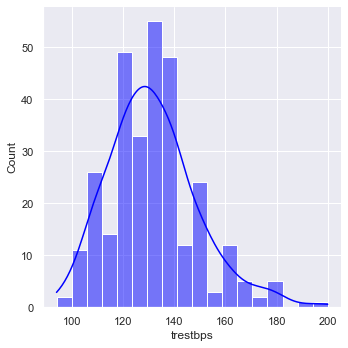

In [13]:
fig = plt.figure(figsize=(7,7))
ax = sns.displot(df.trestbps, color='blue',kde=True,label='Trestbps')

<Figure size 504x504 with 0 Axes>

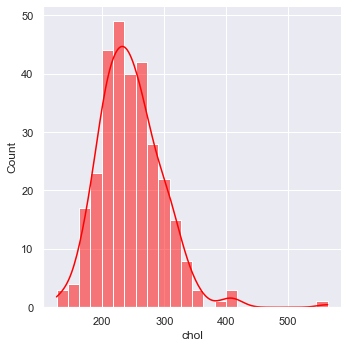

In [14]:
fig = plt.figure(figsize=(7,7))
ax = sns.displot(df.chol,label='Chol',kde=True,color='red')

<Figure size 504x504 with 0 Axes>

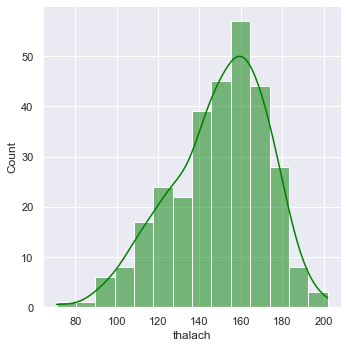

In [15]:
fig = plt.figure(figsize=(7,7))
ax = sns.displot(df.thalach, label='Thalach',kde=True,color='green')

(30.0, 330.0)

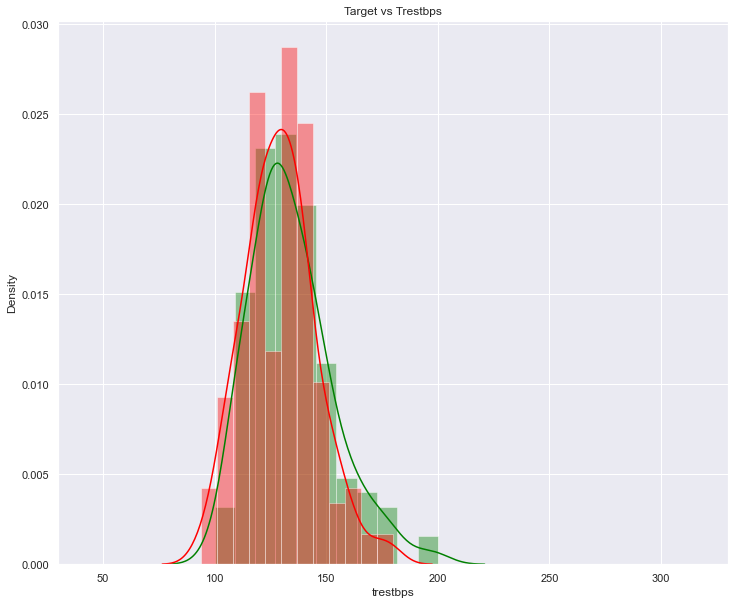

In [16]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['target'] == 0]['trestbps'],color='green')
sns.distplot(df[df['target'] == 1]['trestbps'],color='red')
plt.title('Target vs Trestbps')
plt.xlim([30,330])

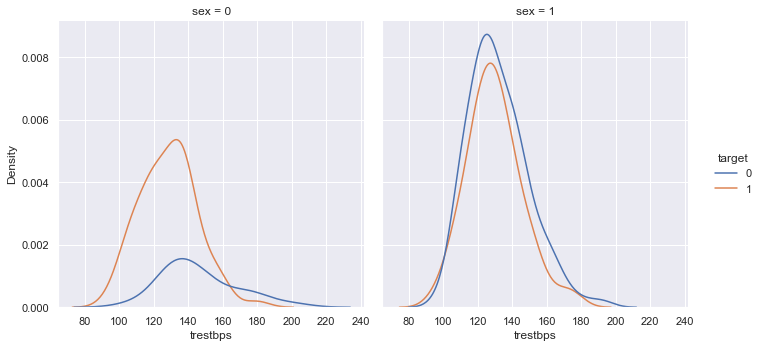

In [17]:
sns.displot(data=df,x=df.trestbps,hue='target',col='sex',kind='kde')

### 2.5 Violin Plot

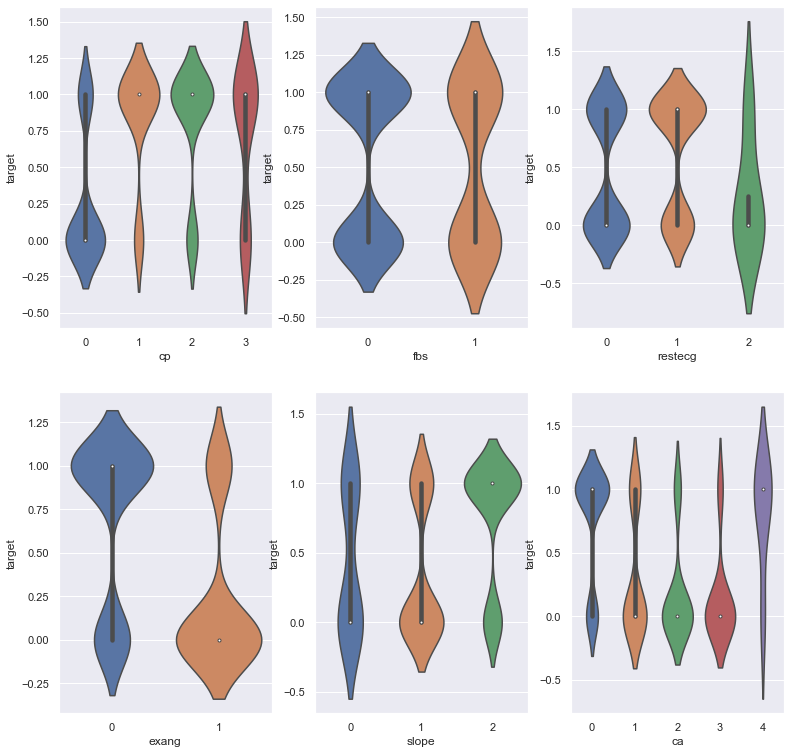

In [18]:
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='cp',y='target',data=df)
plt.subplot(2,3,2)
sns.violinplot(x='fbs',y='target',data=df)
plt.subplot(2,3,3)
sns.violinplot(x='restecg',y='target',data=df)
plt.subplot(2,3,4)
sns.violinplot(x='exang',y='target',data=df)
plt.subplot(2,3,5)
sns.violinplot(x='slope',y='target',data=df)
plt.subplot(2,3,6)
sns.violinplot(x='ca',y='target',data=df)
plt.show()

### 2.6 Box Plot

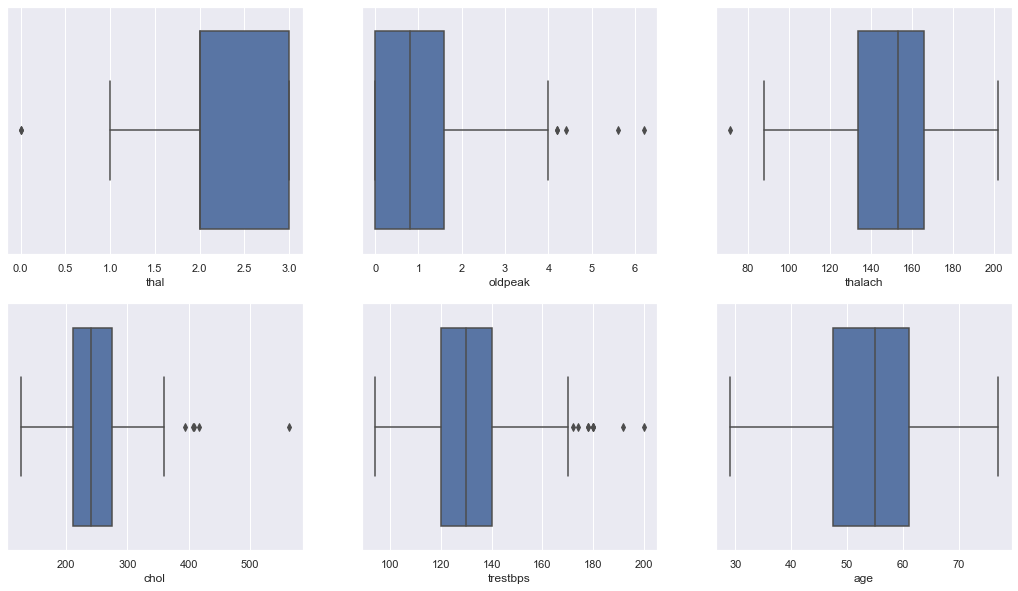

In [19]:
plt.figure(figsize=(18,10))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.boxplot(x='thal',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='oldpeak',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='thalach',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='chol',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='trestbps',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='age',data=df)
plt.show()

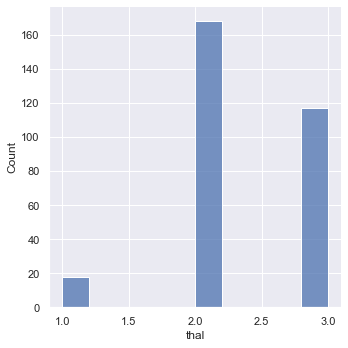

In [20]:
df.thal.mean()
df.loc[ df['thal'] == 0, 'thal'] = 2
sns.displot(data=df,x='thal')

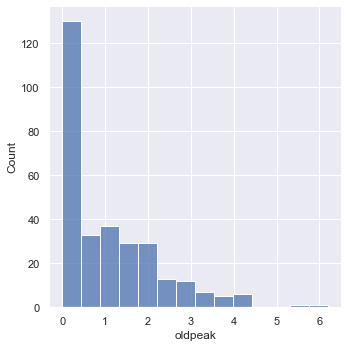

In [21]:
sns.displot(data=df,x='oldpeak')

In [22]:
df2 = df.copy()
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
con_cols = ['age','trestbps','chol','thalach','oldpeak']

In [23]:
# Thalach
df.loc[ df['thalach'] <= 110, 'thalach'] = 0
df.loc[ (df['thalach'] > 110) & (df['thalach'] <= 130),'thalach'] = 1
df.loc[ (df['thalach'] > 130) & (df['thalach'] <= 150),'thalach'] = 2
df.loc[ (df['thalach'] > 150) & (df['thalach'] <= 170),'thalach'] = 3
df.loc[ (df['thalach'] > 170) & (df['thalach'] <= 190),'thalach'] = 4
df.loc[df['thalach'] > 190,'thalach'] = 5

# Thal
df.loc[df['thal'] == 0,'thal'] = 2
df.loc[df['thal'] == 1,'thal'] = 2

# Slope
df.loc[df['slope'] == 0,'slope'] = 1

# Restecg
df.loc[df['restecg'] == 2,'restecg'] = 1

df['age'] = df['age'].astype(float)
df['trestbps'] = df['trestbps'].astype(float)
df['chol'] = df['chol'].astype(float)

# Chol
df.loc[ df['chol'] <= 100, 'chol'] = 0
df.loc[ (df['chol'] > 100) & (df['chol'] <= 150),'chol'] = 1
df.loc[ (df['chol'] > 150) & (df['chol'] <= 200),'chol'] = 2
df.loc[ (df['chol'] > 200) & (df['chol'] <= 250),'chol'] = 3
df.loc[ (df['chol'] > 250) & (df['chol'] <= 300),'chol'] = 4
df.loc[ (df['chol'] > 300) & (df['chol'] <= 350),'chol'] = 5
df.loc[ (df['chol'] > 350) & (df['chol'] <= 400),'chol'] = 6
df.loc[df['chol'] > 400,'chol'] = 0

#trestbps
df.loc[ df['trestbps'] <= 90, 'trestbps'] = 0
df.loc[ (df['trestbps'] > 90) & (df['trestbps'] <= 120),'trestbps'] = 1
df.loc[ (df['trestbps'] > 120) & (df['trestbps'] <= 150),'trestbps'] = 2
df.loc[ (df['trestbps'] > 150) & (df['trestbps'] <= 190),'trestbps'] = 3
df.loc[df['trestbps'] > 190,'trestbps'] = 4


In [24]:
df['AgeBand'] = pd.cut(df['age'], 5)
df[['AgeBand', 'target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,target
0,"(28.952, 38.6]",0.75
1,"(38.6, 48.2]",0.70
2,"(48.2, 57.8]",0.58
3,"(57.8, 67.4]",0.38
4,"(67.4, 77.0]",0.59


In [25]:
df.loc[ df['age'] <= 39, 'age'] = 0
df.loc[ (df['age'] > 39) & (df['age'] <= 48),'age'] = 1
df.loc[ (df['age'] > 48) & (df['age'] <= 58),'age'] = 2
df.loc[ (df['age'] > 58) & (df['age'] <= 68),'age'] = 3
df.loc[df['age'] > 68,'age'] = 4

In [26]:
df.drop('AgeBand',inplace=True,axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3.00,1,3,2.00,3.00,1,0,2,0,2.30,1,0,2,1
1,0.00,1,2,2.00,3.00,0,1,4,0,3.50,1,0,2,1
2,1.00,0,1,2.00,3.00,0,0,4,0,1.40,2,0,2,1
3,2.00,1,1,1.00,3.00,0,1,4,0,0.80,2,0,2,1
4,2.00,0,0,1.00,6.00,0,1,3,1,0.60,2,0,2,1


In [27]:
df['OldpeakBand'] = pd.cut(df['oldpeak'], 5)
df[['OldpeakBand', 'target']].groupby(['OldpeakBand'], as_index=False).mean().sort_values(by='OldpeakBand', ascending=True)

,OldpeakBand,target
0,"(-0.0062, 1.24]",0.67
1,"(1.24, 2.48]",0.44
2,"(2.48, 3.72]",0.10
3,"(3.72, 4.96]",0.14
4,"(4.96, 6.2]",0.00


In [28]:
df.loc[ df['oldpeak'] <= 1.24, 'oldpeak'] = 0
df.loc[ (df['oldpeak'] > 1.24) & (df['oldpeak'] <= 2.48),'oldpeak'] = 1
df.loc[ (df['oldpeak'] > 2.48) & (df['oldpeak'] <= 3.72),'oldpeak'] = 2
df.loc[ (df['oldpeak'] > 3.72) & (df['oldpeak'] <= 4.96),'oldpeak'] = 3
df.loc[df['oldpeak'] > 6.2,'oldpeak'] = 4

In [29]:
df.drop('OldpeakBand',inplace=True,axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3.00,1,3,2.00,3.00,1,0,2,0,1.00,1,0,2,1
1,0.00,1,2,2.00,3.00,0,1,4,0,2.00,1,0,2,1
2,1.00,0,1,2.00,3.00,0,0,4,0,1.00,2,0,2,1
3,2.00,1,1,1.00,3.00,0,1,4,0,0.00,2,0,2,1
4,2.00,0,0,1.00,6.00,0,1,3,1,0.00,2,0,2,1


In [30]:
X = df.drop(['target'],axis=1)
y = df[['target']]

In [31]:
print('X Shape', X.shape)
print('Y Shape',y.shape)

X Shape (303, 13)
Y Shape (303, 1)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (203, 13)
Number transations x_test df (100, 13)
Number transations y_train df (203, 1)
Number transations y_test df (100, 1)


In [33]:
X_train.to_csv('train.csv')
X_test.to_csv('test.csv')

In [34]:
models = []
models.append(['RidgeClassifier',RidgeClassifier()])
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])
models.append(['MLPClassifier',MLPClassifier()])
models.append(['ExtraTreesClassifier',ExtraTreesClassifier()])

In [35]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

RidgeClassifier :
[[33  9]
 [ 9 49]]
Accuracy Score:  0.82

K-Fold Validation Mean Accuracy: 86.64 %

Standard Deviation: 5.59 %

ROC AUC Score: 0.82 %

Precision: 0.84 %

Recall: 0.84 %

F1 Score: 0.84 %
----------------------------------------

XGBClassifier :
[[33  9]
 [12 46]]
Accuracy Score:  0.79

K-Fold Validation Mean Accuracy: 85.26 %

Standard Deviation: 7.78 %

ROC AUC Score: 0.79 %

Precision: 0.84 %

Recall: 0.79 %

F1 Score: 0.81 %
----------------------------------------

Logistic Regression :
[[33  9]
 [ 9 49]]
Accuracy Score:  0.82

K-Fold Validation Mean Accuracy: 86.62 %

Standard Deviation: 5.60 %

ROC AUC Score: 0.82 %

Precision: 0.84 %

Recall: 0.84 %

F1 Score: 0.84 %
----------------------------------------

SVM :
[[33  9]
 [11 47]]
Accuracy Score:  0.8

K-Fold Validation Mean Accuracy: 85.19 %

Standard Deviation: 6.75 %

ROC AUC Score: 0.80 %

Precision: 0.84 %

Recall: 0.81 %

F1 Score: 0.82 %
----------------------------------------

KNeigbors :
[[33  9]
 [

In [36]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
10,MLPClassifier,85.00,87.14,4.05,0.85,0.88,0.86,0.87
6,BernoulliNB,85.00,81.71,5.60,0.85,0.89,0.84,0.87
11,ExtraTreesClassifier,84.00,85.21,8.64,0.84,0.86,0.86,0.86
5,GaussianNB,84.00,85.17,5.10,0.84,0.89,0.83,0.86
0,RidgeClassifier,82.00,86.64,5.59,0.82,0.84,0.84,0.84
2,Logistic Regression,82.00,86.62,5.60,0.82,0.84,0.84,0.84
4,KNeigbors,82.00,82.76,8.60,0.82,0.84,0.84,0.84
9,AdaBoostClassifier,81.00,80.21,8.17,0.82,0.88,0.78,0.83
3,SVM,80.00,85.19,6.75,0.80,0.84,0.81,0.82
1,XGBClassifier,79.00,85.26,7.78,0.79,0.84,0.79,0.81


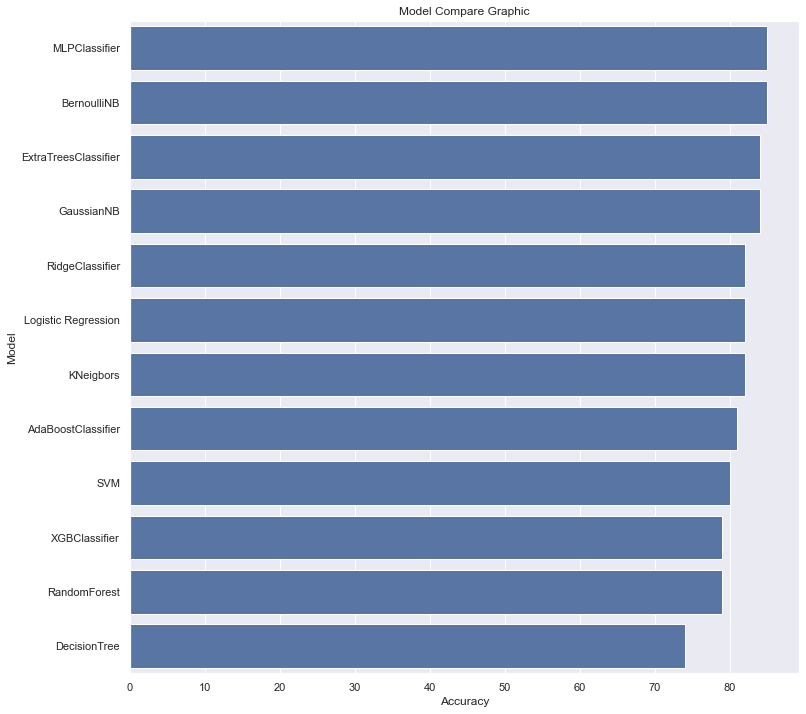

In [37]:
fig = plt.figure(figsize=(12,12))
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');

In [38]:
grid_models = [(GaussianNB(),[{'var_smoothing': np.logspace(0,-9, num=100)}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])
               ]

In [39]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train,y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

 GaussianNB(): 
 Best Accuracy: 85.17 %

-------------------------

 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None): 
 Best Accuracy: 85.26 %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 85.24 %

-------------------------

 DecisionTreeClassifier(): 
 Best Accuracy: 75.83 %

-------------------------

 RandomForestClassifier(): 
 Best Accuracy: 86.71 %

-------------------------



              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.82        58

    accuracy                           0.80       100
   macro avg       0.79      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

ROC AUC score: 0.8801313628899836
Accuracy Score:  0.8


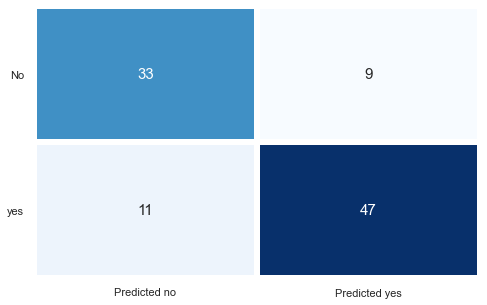

In [40]:
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No', 'yes'], xticklabels = ['Predicted no', 'Predicted yes'])
plt.yticks(rotation = 0)
plt.show()

## Saving the model

In [41]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [42]:
pickle_in = open("model.pkl","rb")
model=pickle.load(pickle_in)